In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
#%config InlineBackend.figure_format='retina'

In [ ]:
def f(x):
    return np.sin(0.2*x) + np.sin(2*x) + 1

x = np.linspace(0, 2*np.pi, 200)
plt.plot(x, f(x), 'k-')

x = np.linspace(np.pi/2, 3*np.pi/2, 100)
plt.fill_between(x, f(x), color='red', alpha=0.3)

plt.xticks([np.pi/2, 3*np.pi/2], ['$\\pi/2$', '$3\\pi/2$'])
plt.yticks([])
plt.xlim([0, 2*np.pi])
plt.ylim([0,3])
plt.show()

1 :[0.0, 0.0]
2 :[0, 1.0]

1 :[0.3, 0.3]
2 :[0, 0.9174311926605504]

1 :[0.6, 0.6]
2 :[0, 0.7352941176470589]

1 :[0.8999999999999999, 0.8999999999999999]
2 :[0, 0.5524861878453039]

1 :[1.2, 1.2]
2 :[0, 0.4098360655737705]

1 :[1.5, 1.5]
2 :[0, 0.3076923076923077]

1 :[1.7999999999999998, 1.7999999999999998]
2 :[0, 0.23584905660377362]

1 :[2.1, 2.1]
2 :[0, 0.18484288354898337]

1 :[2.4, 2.4]
2 :[0, 0.14792899408284024]

1 :[2.6999999999999997, 2.6999999999999997]
2 :[0, 0.12062726176115804]

1 :[3.0, 3.0]
2 :[0, 0.1]



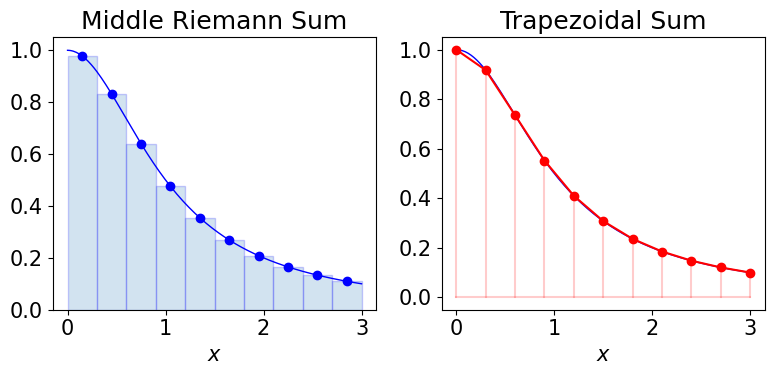

In [24]:
def f(x):
    return 1 / (1 + x*x)

def coord(x):
    return x, f(x)

a, b, N = 0, 3, 10
curve = coord(np.linspace(a, b, 200))

# partition
partition = np.linspace(a, b, N + 1)
left_x = partition[:-1]
right_x = partition[1:]
middle_x = (left_x + right_x) / 2
delta_x = right_x - left_x

# drawing
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(*curve, 'b', lw=1)
plt.plot(*coord(middle_x), 'bo')
plt.bar(*coord(middle_x), width=delta_x[0], alpha=0.2, edgecolor='b')
plt.title('Middle Riemann Sum')
plt.xlabel("$x$")

plt.subplot(1, 2, 2)
plt.plot(*curve, 'b', lw=1)
plt.plot(*coord(partition), 'ro-')
for (x, y) in zip(*coord(partition)):
    plt.plot([x, x], [0, y], 'r-', alpha=0.2)
    print(f"1 :{[x,x]}")
    print(f"2 :{[0,y]}")
    print('')
plt.plot(partition, [0 for _ in partition], 'r-', alpha=0.2)
plt.title('Trapezoidal Sum')
plt.xlabel("$x$")

plt.tight_layout()
plt.show()

In [28]:
def trapezoid_sum(f, partition):
    """Compute the integral of f(x) given the partition using the trapezoid rule.
    
    :param f:
        A function of one variable
    :param partition:
        A sequence of x partition points; the length must be greater than or equal to 2
    """
    
    fx = [f(x) for x in partition] # linspace로 x값들을 분할해서 리스트에 저장
    dx = [r - l for (l, r) in zip(partition[:-1], partition[1:])] #,(2 - 1)/(3 - 2) ...이렇게 나타남
    return 0.5 * sum((a + b) * d for (a, b, d) in zip(fx[:-1], fx[1:], dx)) #공식 그대로 대입

In [29]:
result = trapezoid_sum(np.sin, np.linspace(0, np.pi/2, 1001))

print(f"trapz_sum = {result}, error = {abs(result - 1):.12e}")

trapz_sum = 0.9999997943832322, error = 2.056167678344e-07


In [41]:
exact_value = np.log(2)
target_acc = 10**(-7)

current_acc = 1
N = 2
result = 0
while current_acc > target_acc and N < 1000:
    result = trapezoid_sum(lambda x: 1/x, np.linspace(1, 2, N))
    current_acc = abs(exact_value - result)
    N += 1
    
print(f"approximate value = {result}, number of partition points = {N}")

approximate value = 0.6931472804510836, number of partition points = 793


1: [0.         0.11246062 0.22269813 0.32862039 0.42838444 0.52049084
 0.60384637 0.67779124 0.74209117 0.79689892 0.84269225 0.88019745
 0.91030738 0.93400238 0.95228054 0.96610148 0.97634551 0.98378827
 0.98908886 0.99278924 0.99532141 0.99701994 0.99813675 0.99885655
 0.99931131 0.99959294 0.9997639  0.99986562 0.99992496 0.99995889
 0.9999779 ]
2: [0.09966562712577781, 0.09769544988707551, 0.09387116402811427, 0.08841358505302754, 0.0816271678826284, 0.07387191946266121, 0.06553193073315446, 0.056984332383835094, 0.048572100248143436, 0.040583286441032464, 0.03323811999387083, 0.02668422481279384, 0.02099914564137576, 0.01619860251355084, 0.0122484843754545, 0.009078540369971608, 0.006595968452536189, 0.004697534360295762, 0.003279368390662339, 0.0022440848919732517, 0.0015052796193162775, 0.0009897463156064946, 0.0006379099943948818, 0.0004030173167565132, 0.00024958402420748423, 0.00015150906558856938, 9.015487253985423e-05, 5.258580419863199e-05, 3.006606232131222e-05, 1.6850519

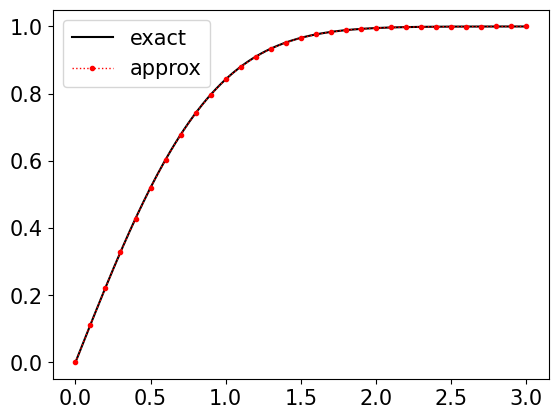

In [64]:
from scipy import special

partition =np.linspace(0, 0.1 ,10)
nsteps = 30
partial_sums = [
    trapezoid_sum(lambda t: np.exp(-t*t), step*max(partition) + partition)
    for step in range(nsteps)]
# step*max(partition) + partition 아래 참조.
# 범위를 0, 0.1 의 10개를 이용하여
#0.        , 0.01111111, 0.02222222, 0.03333333, 0.04444444, (0.1 + 0.1(...)* 1)
#0.1       , 0.11111111, 0.12222222, 0.13333333, 0.14444444, (0.2 + 0.1(...)* 1)
#.
#.
#... 이렇게 범위를 늘려준 것임. 그냥 linspace에 곱과 합을 이용해서 array를 더 늘려준 것.

xs = [i * max(partition) for i in range(nsteps + 1)]
approx_erf = np.cumsum(partial_sums) * 2/np.sqrt(np.pi) #요소를 누적합.
#그래야 x값이 늘어날때마다 요소가 얼마나 차이 나는지를 그래프에 그릴 수 있어진다.
# x는 0.01,3 까지의 숫자. N은 
approx_erf = np.hstack(([0], approx_erf)) #erf(0) = 0 0일때를 추가함.
print(f"1: {approx_erf}")
print(f"2: {partial_sums}")


x_exact = np.linspace(0, 3, 200)
y_exact = special.erf(x_exact)

plt.figure()

plt.plot(x_exact, y_exact, "-k", label="exact")
plt.plot(xs, approx_erf, ".:r", lw=1, label="approx")
plt.legend()

plt.show()



In [93]:
partial_sums1 = [step*max(partition) + partition for step in range(nsteps)]
print(partial_sums1)

[array([0.        , 0.01111111, 0.02222222, 0.03333333, 0.04444444,
       0.05555556, 0.06666667, 0.07777778, 0.08888889, 0.1       ]), array([0.1       , 0.11111111, 0.12222222, 0.13333333, 0.14444444,
       0.15555556, 0.16666667, 0.17777778, 0.18888889, 0.2       ]), array([0.2       , 0.21111111, 0.22222222, 0.23333333, 0.24444444,
       0.25555556, 0.26666667, 0.27777778, 0.28888889, 0.3       ]), array([0.3       , 0.31111111, 0.32222222, 0.33333333, 0.34444444,
       0.35555556, 0.36666667, 0.37777778, 0.38888889, 0.4       ]), array([0.4       , 0.41111111, 0.42222222, 0.43333333, 0.44444444,
       0.45555556, 0.46666667, 0.47777778, 0.48888889, 0.5       ]), array([0.5       , 0.51111111, 0.52222222, 0.53333333, 0.54444444,
       0.55555556, 0.56666667, 0.57777778, 0.58888889, 0.6       ]), array([0.6       , 0.61111111, 0.62222222, 0.63333333, 0.64444444,
       0.65555556, 0.66666667, 0.67777778, 0.68888889, 0.7       ]), array([0.7       , 0.71111111, 0.72222222, 0.73

In [80]:
partition =np.linspace(0, 0.1 ,10)
partition

array([0.        , 0.01111111, 0.02222222, 0.03333333, 0.04444444,
       0.05555556, 0.06666667, 0.07777778, 0.08888889, 0.1       ])

이중 적분의 추정도 쉽게 할 수 있다.

In [75]:
def inner_sum(y):
    return trapezoid_sum(lambda x: y**x, np.linspace(0, 1, 200))
outer_sum = trapezoid_sum(inner_sum, np.linspace(1, 2, 200))

print("approximatio = {}, absolute error = {}".format(outer_sum, abs(outer_sum - 1.2292741342880657562)))

approximatio = 1.229274454246454, absolute error = 3.1995838822851397e-07
